In [63]:
import numpy as np
import matplotlib.pyplot as plt


In [64]:
import csv
times = []
counts = []
meanCurrent = []
with open('OctopoleFillingData_10_04_24(Sheet1).csv', mode ='r')as file:
  csvFile = csv.reader(file,delimiter = ';')
  next(csvFile)
  for lines in csvFile:
        times.append(float(lines[0]))
        counts.append(float(lines[1]))
        meanCurrent.append(0.5*(float(lines[3])+float(lines[4])))
    

[1.         1.         0.5        0.6        1.         1.
 1.         1.         1.         1.         1.         0.96
 0.92307692 0.92307692 0.96       1.         1.         0.92307692
 0.82758621 0.82758621 0.85714286 0.8        0.88888889 1.
 1.         1.         1.         1.         0.96       0.92307692
 0.96       1.         0.96       1.         0.96      ]


Text(0, 0.5, 'Counts per shot')

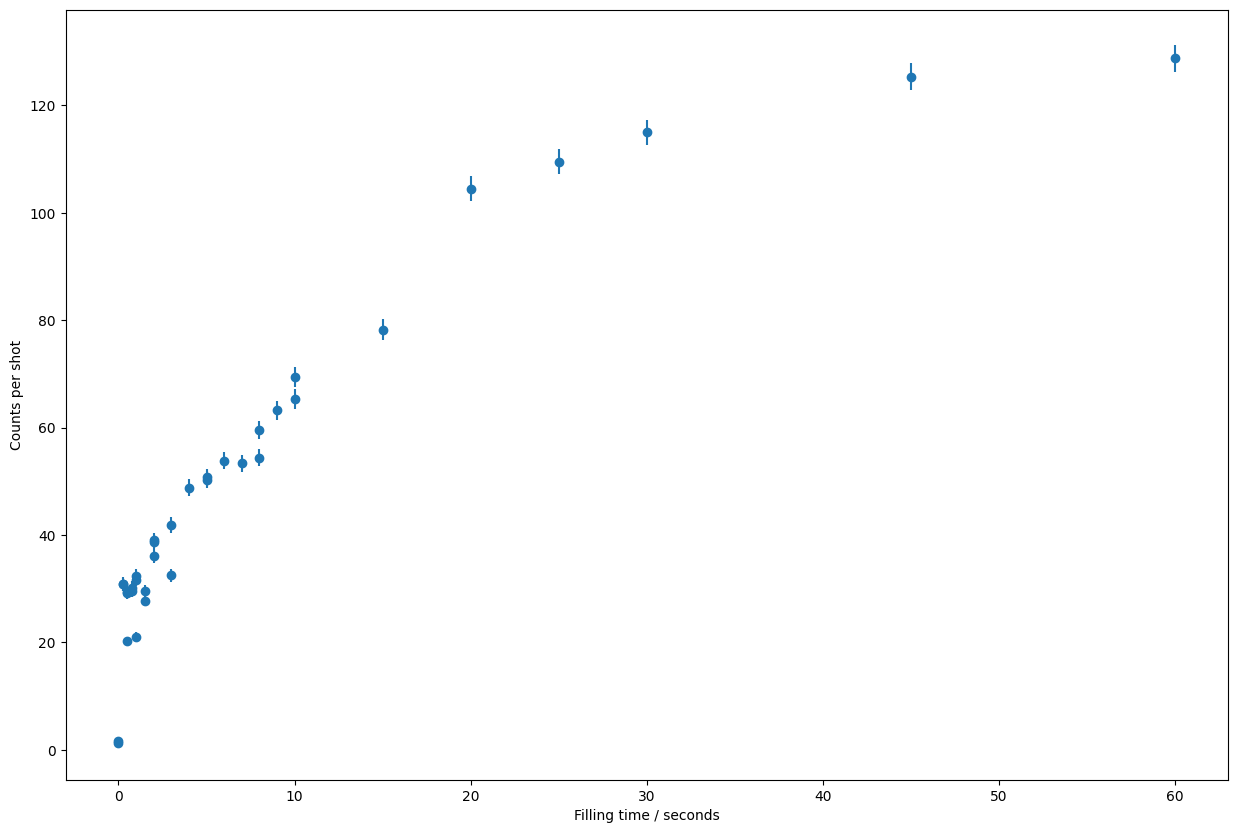

In [65]:
fig,ax = plt.subplots(figsize = (15,10))
adjustmentFactor = meanCurrent[0]/(np.array(meanCurrent))
ax.scatter(times,np.array(counts)/20*adjustmentFactor)
ax.errorbar(times,np.array(counts)/20*adjustmentFactor,np.sqrt(counts)*adjustmentFactor/20,ls = '')
print(adjustmentFactor)
ax.set_xlabel('Filling time / seconds')
ax.set_ylabel('Counts per shot')

[85.07504637  0.2557435 ]


C:\Users\au581149\AppData\Local\Temp\ipykernel_5732\649598209.py:3: RuntimeWarning: overflow encountered in exp
  return a*(1-np.exp(-b*t))


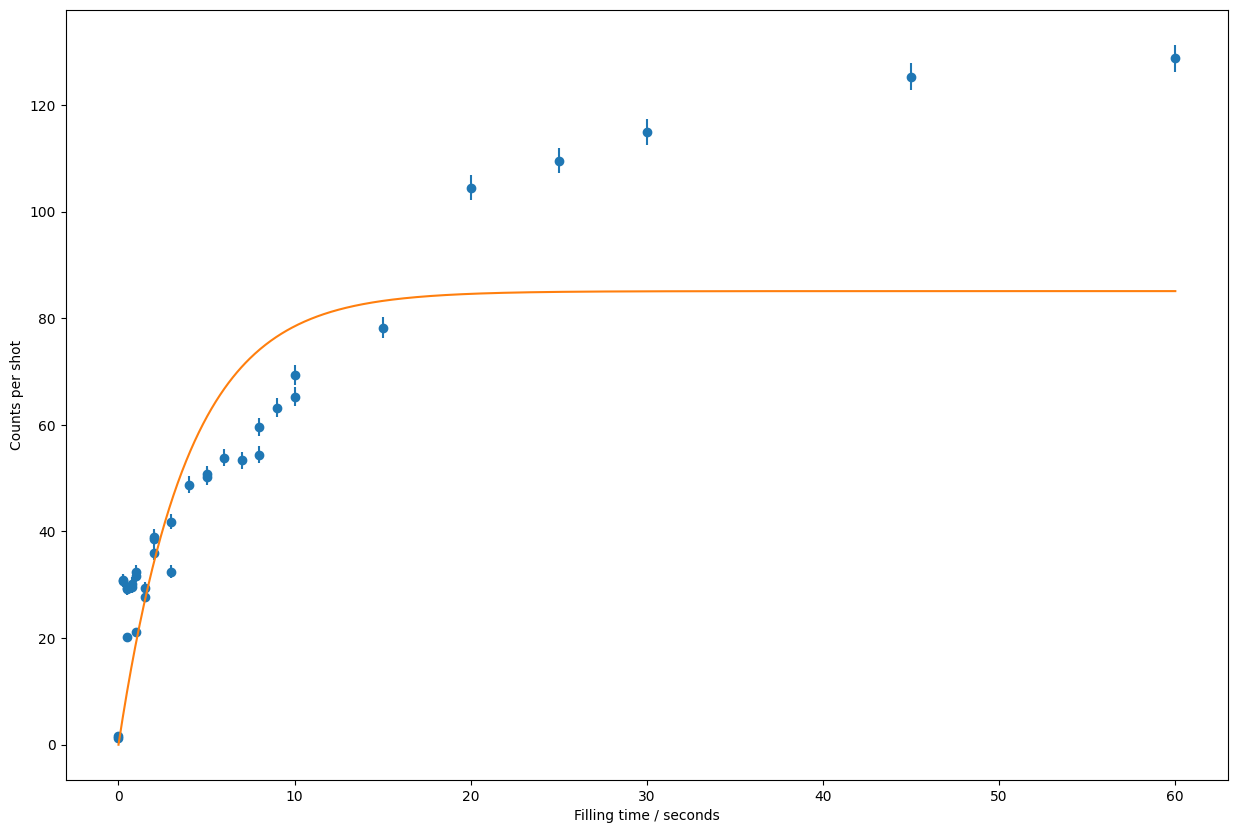

In [66]:
from scipy.optimize import curve_fit
def saturationFunc(t,a,b):
    return a*(1-np.exp(-b*t))
def saturationFunc2(t,a,b):
    return a*t/(b+t)
fitYs = np.array(counts)/20*adjustmentFactor
popt,pcov = curve_fit(saturationFunc,times,fitYs,[120,20],sigma=np.sqrt(counts)*adjustmentFactor/20,absolute_sigma=True)
print(popt)
tSpace = np.linspace(0,60,1000)
ax.plot(tSpace,saturationFunc(tSpace,popt[0],popt[1]))
fig